In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import display
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langchain.prompts import PromptTemplate


In [12]:
class cricket(TypedDict):
     runs: int
     ball : int
     four : int
     six : int
     sr : float
     bpb : float
     boundary_percentage : float

In [17]:
def calculate_sr(state: cricket) -> cricket:
    runs = state['runs']
    ball = state['ball']
    state['sr'] = (runs/ball)*100
    return {'sr': state['sr']}

def calculate_bpb(state: cricket) -> cricket:
    runs = state['runs']
    ball = state['ball']
    state['bpb'] = ball/runs
    return {'bpb': state['bpb']}


def calculate_boundary_percentage(state: cricket) -> cricket:
    four = state['four']
    six = state['six']
    total_boundaries = four + six
    state['boundary_percentage'] = (total_boundaries / state['ball']) * 100
    return {'boundary_percentage': state['boundary_percentage']}

def summary(state: cricket) -> cricket:
    runs = state['runs']
    ball = state['ball']
    four = state['four']
    six = state['six']
    sr = state['sr']
    bpb = state['bpb']
    boundary_percentage = state['boundary_percentage']
    
    summary_text = (f"Runs: {runs}, Balls: {ball}, Fours: {four}, Sixes: {six}, "
                    f"Strike Rate: {sr:.2f}, Balls per Run: {bpb:.2f}, "
                    f"Boundary Percentage: {boundary_percentage:.2f}%")
    
    state['summary'] = summary_text
    return state

In [18]:
graph = StateGraph(cricket)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percentage')
graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')
graph.add_edge('summary', END)
  # Display the graph structure

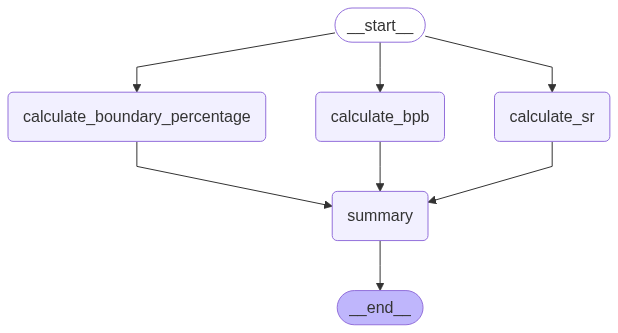

In [16]:
graph.compile()

In [19]:
workflow = graph.compile()
initial_state = {'runs': 120, 'ball': 80, 'four': 10, 'six': 5}
result = workflow.invoke(initial_state)
print(result)

{'runs': 120, 'ball': 80, 'four': 10, 'six': 5, 'sr': 150.0, 'bpb': 0.6666666666666666, 'boundary_percentage': 18.75}
